In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

%matplotlib inline





# Percent Female Students in Secondary Education (Cleaning Data)

In [3]:
#reading in data on female students in school
percent_female_in_secondary_school = pd.read_csv("../data/%_female_in_secondary_education.csv")

In [4]:
#dropping columns not used and renaming remaining columns
percent_female_in_secondary_school = percent_female_in_secondary_school.drop(['Sex','Age group','Units of measurement'], axis = 1)
percent_female_in_secondary_school.columns = ['Country', 'Year','%_female_students_in_secondary']



# Male/Female Number of Seats in Parliament/ House/ Senate (Cleaning Data)

In [5]:
#reading in data on female members of countries parliament
male_female_parliamentary_seats = pd.read_csv("../data/parliamentary_seats_in_upper_house_senate.csv")

In [6]:
#dropping columns not used
#Checked and nothing is important about footnotes
male_female_parliamentary_seats = male_female_parliamentary_seats.drop(['Source','Unit','Value Footnotes'], axis = 1)

In [7]:
#renaming remaining columns
male_female_parliamentary_seats.columns = ['Country', 'Sex', 'Year', 'Number_of_Seats_Held']

In [8]:
#making year and number_seats_held into int
male_female_parliamentary_seats = male_female_parliamentary_seats.dropna()
male_female_parliamentary_seats['Year'] = male_female_parliamentary_seats['Year'].astype(int)
male_female_parliamentary_seats['Number_of_Seats_Held'] = male_female_parliamentary_seats['Number_of_Seats_Held'].astype(int)

In [9]:
#Pivoting the Table
male_female_parliamentary_seats_pivot = male_female_parliamentary_seats.pivot_table(index = ['Country','Year'], columns = 'Sex', values = 'Number_of_Seats_Held').reset_index().rename_axis(None, axis = 1)

In [10]:
#Renaming columns for the pivot
male_female_parliamentary_seats_pivot.columns = ['Country', 'Year', 'Number_of_Seats_Held_Female','Number_of_Seats_Held_Male']


    
  
# Percent of Women in Country's Labor Force (Cleaning Data)

In [11]:
#reading in data on female % of workforce
percent_women_in_labour_force = pd.read_csv("../data/womens_%_labour_force.csv")

In [12]:
#dropping columns not used and renaming remaining columns
#Checked and nothing is important about footnotes
percent_women_in_labour_force = percent_women_in_labour_force.drop(['Subgroup','Unit','Value Footnotes'], axis = 1)

In [13]:
#renaming columns
percent_women_in_labour_force.columns = ['Country','Year','%_women_in_labor_force']

In [14]:
#changing year to int
percent_women_in_labour_force = percent_women_in_labour_force.dropna()
percent_women_in_labour_force['Year'] = percent_women_in_labour_force['Year'].astype(int)

 
# Merging the 3 data sets with inner join 

In [15]:
#merging female in education with parliament data
education_and_parliament_df = percent_female_in_secondary_school.merge(male_female_parliamentary_seats_pivot, on = ['Country','Year'], how = 'inner')

In [16]:
#merging education_and_parliament with labor force data
education_and_gender = education_and_parliament_df.merge(percent_women_in_labour_force, on = ['Country','Year'], how = 'inner')

In [17]:
#Creating a cloumn for the percent female in parliament
education_and_gender['%_female_in_parliament'] = (education_and_gender['Number_of_Seats_Held_Female'] / (education_and_gender['Number_of_Seats_Held_Female'] + education_and_gender['Number_of_Seats_Held_Male']))*100

  
# Exploring Data

In [18]:
education_and_gender.describe()

,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,2002.081395,48.746737,12.472093,81.246512,40.725116,15.975574
std,2.750779,3.986931,11.604714,74.941965,6.696112,10.278572
min,1997.000000,25.402520,0.000000,5.000000,16.600000,0.000000
25%,2000.000000,48.019588,4.000000,34.000000,38.350000,7.975460
50%,2002.000000,49.347365,9.000000,52.000000,42.900000,13.363095
75%,2005.000000,50.788713,18.000000,96.000000,44.900000,23.166023
max,2006.000000,58.682280,63.000000,303.000000,52.400000,59.420290


In [132]:
education_and_gender[education_and_gender['%_female_students_in_secondary']<35]

,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
0,Afghanistan,2006,25.40252,23,79,29.4,22.549020
91,Cambodia,2000,34.89699,8,53,51.4,13.114754
253,Mauritania,1997,34.51685,0,56,40.1,0.000000
429,Yemen,2005,32.07058,3,108,28.0,2.702703


In [133]:
education_and_gender[education_and_gender['%_female_in_parliament']>50]

,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
162,Germany,2000,48.35321,41,28,43.7,59.42029


In [135]:
percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Guinea Bissau']

,Country,Year,%_female_students_in_secondary



# Visualization

In [19]:
Oman_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Oman']
Nepal_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Nepal']
Afghanistan_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Afghanistan']
Lesotho_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Lesotho']
Saint_Lucia_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Saint Lucia']
Nicaragua_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Nicaragua']
Peru_secondary = percent_female_in_secondary_school[percent_female_in_secondary_school['Country']=='Peru']

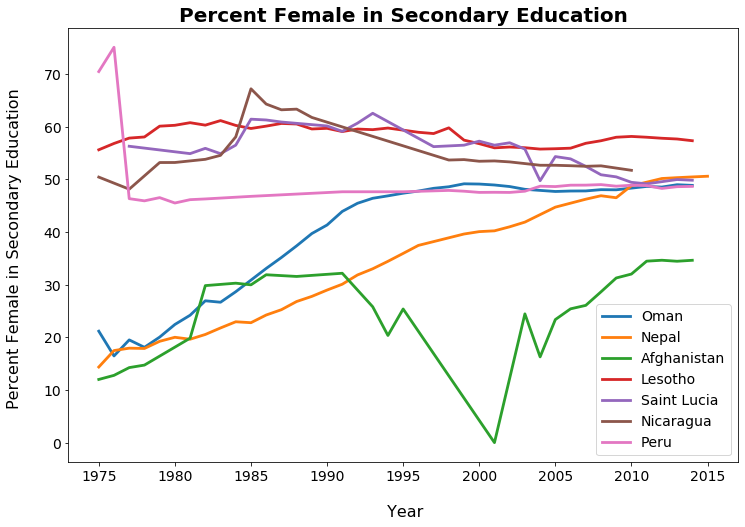

In [60]:
#Creating a Line PLot for the countries with the lowest secondary education female rates
plt.figure(figsize = (12,8))
plt.plot(Oman_secondary['Year'],Oman_secondary['%_female_students_in_secondary'], label = 'Oman', linewidth = 2.8)
plt.plot(Nepal_secondary['Year'],Nepal_secondary['%_female_students_in_secondary'], label = 'Nepal', linewidth = 2.8)
plt.plot(Afghanistan_secondary['Year'],Afghanistan_secondary['%_female_students_in_secondary'], label = 'Afghanistan', linewidth = 2.8)
plt.plot(Lesotho_secondary['Year'],Lesotho_secondary['%_female_students_in_secondary'], label = 'Lesotho', linewidth = 2.8)
plt.plot(Saint_Lucia_secondary['Year'],Saint_Lucia_secondary['%_female_students_in_secondary'], label = 'Saint Lucia', linewidth = 2.8)
plt.plot(Nicaragua_secondary['Year'],Nicaragua_secondary['%_female_students_in_secondary'], label = 'Nicaragua', linewidth = 2.8)
plt.plot(Peru_secondary['Year'],Peru_secondary['%_female_students_in_secondary'], label = 'Peru', linewidth = 2.8)
plt.xlabel('\n Year',fontsize = 16, fontweight = 540)
plt.ylabel('Percent Female in Secondary Education \n',fontsize = 16, fontweight = 540)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Percent Female in Secondary Education', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize = 14)
plt.savefig('Percent Female in Secondary Education Line Graph.png', dpi = 150);

High rates in lesotho due to males moving to south africa
https://borgenproject.org/female-education-in-lesotho/

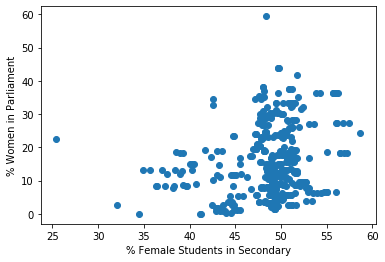

In [61]:
plt.scatter(x = education_and_gender['%_female_students_in_secondary'], y = education_and_gender['%_female_in_parliament'])
plt.xlabel('% Female Students in Secondary')
plt.ylabel('% Women in Parliament')
plt.savefig('ed Parliament.png', dpi = 150);

In [73]:
#reading in countinents df
continents = pd.read_csv("../data/continents.csv")

In [74]:
education_and_gender = education_and_gender.merge(continents, how = 'inner', on = 'Country')

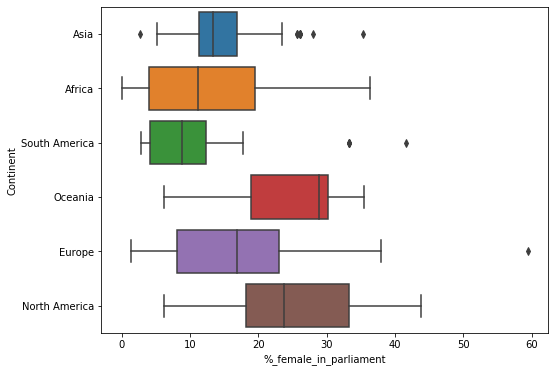

In [75]:
plt.figure(figsize = (8,6))
sns.boxplot(data = education_and_gender, x = '%_female_in_parliament', y = 'Continent')